In [1]:
## Establish connection to Orthanc server

from utils import queryStudies
from pyorthanc import Orthanc, RemoteModality
orthanc = Orthanc('http://orthanc:8042')
orthanc.setup_credentials('user', 'password')
print(orthanc.get_modalities())
PACS = "FMC"
remote_modality = RemoteModality(orthanc, PACS)
print(remote_modality.echo())

['DataCentre', 'FMC', 'sample']
True


In [15]:
## Get the database values.
## Choose which Modalities you want to access.
## Use this as a reference: https://www.dicomlibrary.com/dicom/modality/

import pandas as pd
from utils import create_dateRanges, queryStudies

start = pd.Timestamp('20210101')
end = pd.Timestamp('20220101')
date_ranges = create_dateRanges(start, end, 10)

# Include "*chest*" in search because this is ubiquitous in final study
#  descriptions post filtering.
print('\nBegining CR search...')
studies_CRchest = queryStudies(
    orthanc,
    PACS,
    StudyDate=date_ranges[:2],
    StudyDescription="*chest*",
    ModalitiesInStudy="*CR*"
)

print('\nBegining DX search...')
studies_DXchest = queryStudies(
    orthanc,
    PACS,
    StudyDate=date_ranges[:2],
    StudyDescription="*chest*",
    ModalitiesInStudy="*DX*"
)

print('\nBeginning CT search...')
studies_CTchest = queryStudies(
    orthanc,
    PACS,
    StudyDate=date_ranges[:2],
    StudyDescription="*chest*",
    ModalitiesInStudy="*CT*"
)

studies_all = [studies_CRchest, studies_DXchest, studies_CTchest]


Begining CR search...
Searching date range: 20210101-20210205
274 studies found! Retrieving Study details...


100%|██████████| 274/274 [00:00<00:00, 562.53it/s]


Searching date range: 20210206-20210314
316 studies found! Retrieving Study details...


100%|██████████| 316/316 [00:00<00:00, 744.38it/s] 



Begining DX search...
Searching date range: 20210101-20210205
3530 studies found! Retrieving Study details...


100%|██████████| 3530/3530 [00:05<00:00, 698.76it/s]


Searching date range: 20210206-20210314
3794 studies found! Retrieving Study details...


100%|██████████| 3794/3794 [00:03<00:00, 1207.81it/s] 



Beginning CT search...
Searching date range: 20210101-20210205
311 studies found! Retrieving Study details...


100%|██████████| 311/311 [00:00<00:00, 657.08it/s]


Searching date range: 20210206-20210314
315 studies found! Retrieving Study details...


100%|██████████| 315/315 [00:00<00:00, 662.13it/s]


In [16]:
from utils import studieslist2df, months_between_df

# Convert list of queries into dataframe
studies_df = studieslist2df(studies_all)

# Remove empty elements in list.
# studies_df = [study for study in studies_df if study != []]
# studies_df = pd.DataFrame(studies_df)
# Remove duplicates and nans
studies_df.dropna(inplace=True)
studies_df.drop_duplicates(subset='AccessionNumber', inplace=True)
# Change study description to lowercase
studies_df['StudyDescription'] = studies_df['StudyDescription'].str.lower()
# Add 'PatientAgeMonths' column to dataframe
datePairs = list(zip(studies_df['PatientBirthDate'],studies_df['StudyDate']))
studies_df['datePairs'] = datePairs
studies_df['PatientAgeMonths'] = studies_df.datePairs.apply(lambda x: months_between_df(x))    
studies_df


,AccessionNumber,IssuerOfPatientID,ModalitiesInStudy,NumberOfStudyRelatedSeries,PatientBirthDate,PatientID,PatientName,PatientSex,QueryRetrieveLevel,RetrieveAETitle,SpecificCharacterSet,StudyDate,StudyDescription,StudyInstanceUID,TypeOfPatientID,datePairs,PatientAgeMonths
0,5011840803,FMC,OT\CR\SR,5,19440806,007182142,BOTTRILL^MAXWELL^RICHARD^MR,M,STUDY,433wfmFIR,ISO_IR 100,20210104,xr chest,1.2.840.113564.9.1.2815321601.78.2.5011840803,TEXT,"(19440806, 20210104)",917
1,5011840760,FMC,OT\CR\SR,4,19610220,012859947,WHEATLEY^TONY,M,STUDY,433wfmFIR,ISO_IR 100,20210104,xr chest,1.2.840.113564.9.1.2815321601.78.2.5011840760,TEXT,"(19610220, 20210104)",718
2,5011841610,FMC,OT\CR\SR,4,19361223,000272073,TAPAKIS^YIANNOULLA^ANDREA^MS,F,STUDY,433wfmFIR,ISO_IR 100,20210104,xr chest,1.2.840.113564.9.1.2815321601.78.2.5011841610,TEXT,"(19361223, 20210104)",1008
3,5011842333,FMC,OT\CR\SR,4,19380519,004557447,LONG^PAULINE^ANNE,F,STUDY,433wfmFIR,ISO_IR 100,20210104,xr chest,1.2.840.113564.9.1.2815321601.78.2.5011842333,TEXT,"(19380519, 20210104)",992
4,5011841846,FMC,OT\CR\SR,4,19450319,012280345,MENZEL^JENIFER^MAY,F,STUDY,433wfmFIR,ISO_IR 100,20210104,xr chest,1.2.840.113564.9.1.2815321601.78.2.5011841846,TEXT,"(19450319, 20210104)",910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8535,5012014259,FMC,OT\CT\SR\PR,17,19670522,008708564,TEMBY^BRETT^JON^MR,M,STUDY,433wfmFIR,ISO_IR 100,20210314,ct chest abdomen pelvis,1.2.840.113564.9.1.2815321601.78.2.5012014259,TEXT,"(19670522, 20210314)",646
8536,5012014224,FMC,OT\CT\SR,12,19691018,011091841,PATERSON^TODD^HUGH^MR,M,STUDY,433wfmFIR,ISO_IR 100,20210314,ct chest,1.2.840.113564.9.1.2815321601.78.2.5012014224,TEXT,"(19691018, 20210314)",617
8537,5011952246,FMC,OT\CT\SR,20,19410628,011939750,GAY^JUDITH^RAE^MS,F,STUDY,433wfmFIR,ISO_IR 100,20210314,ct chest abdomen pelvis,1.2.840.113564.9.1.2815321601.78.2.5011952246,TEXT,"(19410628, 20210314)",957
8538,5012014596,FMC,OT\CT\SR,30,19711026,000840560,PUCCINI^FILIPPO,M,STUDY,433wfmFIR,ISO_IR 100,20210314,ct chest abdomen pelvis,1.2.840.113564.9.1.2815321601.78.2.5012014596,TEXT,"(19711026, 20210314)",593


xr chest                              7527
ct chest                               198
ct chest high resolution                32
ct chest and high resolution chest       3
chest  x-ray                             2
ct chest with contrast                   1
Name: StudyDescription, dtype: int64
M    4095
F    3668
Name: PatientSex, dtype: int64


,AccessionNumber,IssuerOfPatientID,ModalitiesInStudy,NumberOfStudyRelatedSeries,PatientBirthDate,PatientID,PatientName,PatientSex,QueryRetrieveLevel,RetrieveAETitle,SpecificCharacterSet,StudyDate,StudyDescription,StudyInstanceUID,TypeOfPatientID,datePairs,PatientAgeMonths
0,5011840803,FMC,OT\CR\SR,5,19440806,007182142,BOTTRILL^MAXWELL^RICHARD^MR,M,STUDY,433wfmFIR,ISO_IR 100,20210104,xr chest,1.2.840.113564.9.1.2815321601.78.2.5011840803,TEXT,"(19440806, 20210104)",917
1,5011840760,FMC,OT\CR\SR,4,19610220,012859947,WHEATLEY^TONY,M,STUDY,433wfmFIR,ISO_IR 100,20210104,xr chest,1.2.840.113564.9.1.2815321601.78.2.5011840760,TEXT,"(19610220, 20210104)",718
2,5011841610,FMC,OT\CR\SR,4,19361223,000272073,TAPAKIS^YIANNOULLA^ANDREA^MS,F,STUDY,433wfmFIR,ISO_IR 100,20210104,xr chest,1.2.840.113564.9.1.2815321601.78.2.5011841610,TEXT,"(19361223, 20210104)",1008
3,5011842333,FMC,OT\CR\SR,4,19380519,004557447,LONG^PAULINE^ANNE,F,STUDY,433wfmFIR,ISO_IR 100,20210104,xr chest,1.2.840.113564.9.1.2815321601.78.2.5011842333,TEXT,"(19380519, 20210104)",992
4,5011841846,FMC,OT\CR\SR,4,19450319,012280345,MENZEL^JENIFER^MAY,F,STUDY,433wfmFIR,ISO_IR 100,20210104,xr chest,1.2.840.113564.9.1.2815321601.78.2.5011841846,TEXT,"(19450319, 20210104)",910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8522,5012012778,FMC,OT\CT\SR,14,19750115,001856740,BEAMES^KARLA^ANN^MS,F,STUDY,433wfmFIR,ISO_IR 100,20210313,ct chest,1.2.840.113564.9.1.2815321601.78.2.5012012778,TEXT,"(19750115, 20210313)",554
8523,5012013058,FMC,OT\CT\SR\PR,12,19470428,001673688,VAN RHODA^JANETTE^RUTH^MRS,F,STUDY,433wfmFIR,ISO_IR 100,20210313,ct chest,1.2.840.113564.9.1.2815321601.78.2.5012013058,TEXT,"(19470428, 20210313)",887
8529,5012013889,FMC,OT\CT\SR,12,19841124,007188050,CARROLL^JENNIFER^JEANETTE^MS,F,STUDY,433wfmFIR,ISO_IR 100,20210314,ct chest,1.2.840.113564.9.1.2815321601.78.2.5012013889,TEXT,"(19841124, 20210314)",436
8533,5011580834,FMC,OT\CT\SR,11,19480813,000110541,KNOTT^DESMOND^BARRY^MR^RGH,M,STUDY,433wfmFIR,ISO_IR 100,20210314,ct chest,1.2.840.113564.9.1.2815321601.78.2.5011580834,TEXT,"(19480813, 20210314)",871


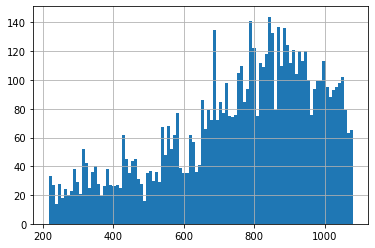

In [79]:
## Filter studies
from utils import months_between_df

studies_df_filter = studies_df

## Filter based on study descriptions
# To filter, write a term you want to remove in the remove_terms, then rerun 
#  this cell. The remaining study descriptions will be displayed, allowing
#  for the next terms to be selected.  
# The target here is to remove images which aren't useful. We want to be 
#  specific, not sensitive, meaning it's better to remove some possibly 
#  useful images if it means removing more of the disruptive CTs.
# keep_terms=['chest', 'torso', 'thora']
remove_terms=['abdomen', 'pelvis', 'right', 'left', 'spine', 'brain', 'head', 'external', 'angiogram', 'whole body', 'skeletal', 'neck']
# keep_string="|".join(keep_terms)
remove_string = "|".join(remove_terms)

# print(studies_df['StudyDescription'].str.contains('chest'))
studies_df_filter = studies_df_filter[
    ~studies_df_filter['StudyDescription'].str.contains(remove_string, regex=True)
    # & studies_df_filter['StudyDescription'].str.contains(keep_string, regex=True)
    ]
print(studies_df_filter['StudyDescription'].value_counts())


# Remove non M/F sexes
studies_df_filter = studies_df_filter[studies_df_filter['PatientSex'].isin(['M', 'F'])]
print(studies_df_filter['PatientSex'].value_counts())

# # Filter by modalities
# # print(studies_df['ModalitiesInStudy'].value_counts())
# modalities = studies_df_filter[['ModalitiesInStudy']].values_counts()
# unique_modalities = np.unique(modalities)
# individual_modalities = [modality.split("\\") for modality in unique_modalities]
# individual_modalities = list(set(itertools.chain(*individual_modalities)))
# print(individual_modalities)

# # Check these against the DICOM format to see which should be removed
# # https://www.dicomlibrary.com/dicom/modality/
# remove_modalities = "PT"
# studies_df_filter = studies_df_filter[~studies_df_filter['ModalitiesInStudy'].str.contains(remove_modalities, regex=True)]
# print(studies_df_filter['ModalitiesInStudy'].value_counts())

# Filter based on age limits of 18 - 90
# 18 to 90 years is equivalent to 216 to 1080 months
studies_df_filter = studies_df_filter[studies_df_filter['PatientAgeMonths']>216]
studies_df_filter = studies_df_filter[studies_df_filter['PatientAgeMonths']<1080]
studies_df_filter['PatientAgeMonths'].hist(bins=100)
studies_df_filter

In [20]:
## Check how many studies have been filtered out
print("Initial number of studies: {}".format(len(studies_df)))
print("Final number of studies {}".format(len(studies_df_filter)))
print("Number of studies removed = {}".format(len(studies_df)-len(studies_df_filter)))

Initial number of studies: 8518
Final number of studies 6858
Number of studies removed = 1660


In [21]:
## Save minimum necessary information for studies
studies_df_save = studies_df_filter[['AccessionNumber','ModalitiesInStudy','PatientSex','PatientAgeMonths','StudyDescription', 'NumberOfStudyRelatedSeries','StudyInstanceUID']]
studies_df_save.to_pickle('all_chest_studies_to_get.pkl')
studies_df_save.to_csv('all_chest_studies_to_get.csv')


In [22]:
## Establish connection to Orthanc server
from utils import queryStudies
from pyorthanc import Orthanc, RemoteModality
orthanc = Orthanc('http://orthanc:8042')
orthanc.setup_credentials('user', 'password')
print(orthanc.get_modalities())
PACS = "FMC"
remote_modality = RemoteModality(orthanc, PACS)
print(remote_modality.echo())

['DataCentre', 'FMC', 'sample']
True


In [95]:
import math
print(math.ceil(500/100))

5


In [61]:
import itertools
from utils import get_subgroup
import math
import random
import pickle

def continue_function(fn, sequence, batch_size,
                        checkpoint=0, dump_name='dump'):
    # Repeatedly attempts the function if it crashes and continues without losing information.
    sequence_length = len(sequence)
    n_iter = math.ceil(sequence_length/batch_size)
    output_array = []
    while checkpoint < n_iter:
        print("Starting at checkpoint {}".format(checkpoint))
        # Load checkpoint data if available
        try:
            with open(dump_name+str(checkpoint)+'.pkl','rb') as f:
                output_array = pickle.load(f)
                print("Loading from {} file".format(
                    dump_name+str(checkpoint)+'.pkl'
                ))
        except:
            pass
        for subgroup in itertools.islice(
            get_subgroup(sequence, batch_size),
            checkpoint, None):
                try: 
                    fn_output = fn(subgroup)
                    # print(fn_output)
                    output_array.extend(fn_output)
                    checkpoint = checkpoint+1
                except:
                    print("System crashed at checkpoint {}".format(checkpoint))
                    print("Saving output array to {} before restarting".format(
                        dump_name+str(checkpoint)+'.pkl'
                    ))
                    with open(dump_name+str(checkpoint)+'.pkl','wb') as f:
                        pickle.dump(output_array,f,-1)
                    break

    return output_array

my_array = [x for x in range(100)]
batch_size=10
def sum_crash(seq):
    rand = random.random()
    if rand > 0.8: #Crash
        print("ERROR")
        raise ValueError
    else:
        return [sum(seq)]

subsums = continue_function(sum_crash, my_array, batch_size, dump_name='sums')
print(subsums)

# print("Continuing from checkpoint {}".format(checkpoint))
# for subgroup in itertools.islice(
#     get_subgroup(my_array, group_size),
#     checkpoint, None):
#     subsum = sum(subgroup)
#     print(subsum)
#     if subsum > 100: # Failure condition. This doesn't get saved
#         break
#     subsums.extend([subsum])
#     checkpoint = checkpoint + 1
# print("System crashed at checkpoint {}".format(checkpoint))
# print(len(subsums))
# print(checkpoint*group_size)

# # Continue from previous checkpoint
# print("Continuing from checkpoint {}".format(checkpoint))
# for subgroup in itertools.islice(
#     get_subgroup(my_array, group_size),
#     checkpoint, None):
#     subsum = sum(subgroup)
#     print(subsum)
#     subsums.extend([subsum])
#     checkpoint = checkpoint + 1
# print(subsums)

Starting at checkpoint 0
ERROR
System crashed at checkpoint 1
Saving output array to sums1.pkl before restarting
Starting at checkpoint 1
Loading from sums1.pkl file
ERROR
System crashed at checkpoint 4
Saving output array to sums4.pkl before restarting
Starting at checkpoint 4
Loading from sums4.pkl file
ERROR
System crashed at checkpoint 6
Saving output array to sums6.pkl before restarting
Starting at checkpoint 6
Loading from sums6.pkl file
[45, 145, 245, 345, 445, 545, 645, 745, 845, 945]


In [62]:
# Extract series corresponding to the studies
from utils import getSeriesfromStudyDF, serieslist2df, get_subgroup
import pandas as pd

target_studies = pd.read_pickle('all_chest_studies_to_get.pkl')

# Break into groups of 1000 for buffering
# Check if previously run. Start from that counter.

extract_fn = lambda x: getSeriesfromStudyDF(orthanc, PACS, x)
batch_size = 1000
series_list = continue_function(extract_fn, target_studies, batch_size)

# print("Total number of studies is {}".format(len(target_studies)))
# group_size = 1000
# series = []
# counter = 0
# for group in get_subgroup(target_studies, group_size):
#     series_group = getSeriesfromStudyDF(orthanc, PACS, group)
#     series.extend(series_group)

# Successfully extracted all data. Reset counter.

series_df = serieslist2df(series_list)
series_df
with open('series_extraction.pkl', 'wb') as file:
    pickle.dump(series_df, file)


Starting at checkpoint 0
1000 studies found! Retrieving Series details...


100%|██████████| 1000/1000 [01:14<00:00, 13.42it/s]


1000 studies found! Retrieving Series details...


100%|██████████| 1000/1000 [01:09<00:00, 14.32it/s]


1000 studies found! Retrieving Series details...


100%|██████████| 1000/1000 [01:14<00:00, 13.43it/s]


1000 studies found! Retrieving Series details...


100%|██████████| 1000/1000 [01:09<00:00, 14.29it/s]


1000 studies found! Retrieving Series details...


100%|██████████| 1000/1000 [01:09<00:00, 14.34it/s]


1000 studies found! Retrieving Series details...


100%|██████████| 1000/1000 [01:08<00:00, 14.65it/s]


858 studies found! Retrieving Series details...


100%|██████████| 858/858 [01:03<00:00, 13.57it/s]


,AccessionNumber,IssuerOfPatientID,Modality,NumberOfSeriesRelatedInstances,PatientID,QueryRetrieveLevel,RetrieveAETitle,SeriesDescription,SeriesInstanceUID,SpecificCharacterSet,StudyInstanceUID,TypeOfPatientID
0,5011840803,FMC,SR,1,007182142,SERIES,433wfmFIR,Carestream PACS Reports,1.2.840.113704.7.1.1.2692695975.916729762.2326...,ISO_IR 100,1.2.840.113564.9.1.2815321601.78.2.5011840803,TEXT
1,5011840803,FMC,CR,1,007182142,SERIES,433wfmFIR,PA CXR,1.3.46.670589.30.1.6.1.137642671280.1609714223...,ISO_IR 100,1.2.840.113564.9.1.2815321601.78.2.5011840803,TEXT
2,5011840803,FMC,CR,1,007182142,SERIES,433wfmFIR,Lateral L,1.3.46.670589.30.1.6.1.137642671280.1609714225...,ISO_IR 100,1.2.840.113564.9.1.2815321601.78.2.5011840803,TEXT
3,5011840803,FMC,CR,1,007182142,SERIES,433wfmFIR,PA Expiration,1.3.46.670589.30.1.6.1.137642671280.1609714226...,ISO_IR 100,1.2.840.113564.9.1.2815321601.78.2.5011840803,TEXT
4,5011840803,FMC,OT,2,007182142,SERIES,433wfmFIR,XR Chest,1.3.6.1.4.1.23849.1168951956.11.16374534893044...,ISO_IR 100,1.2.840.113564.9.1.2815321601.78.2.5011840803,TEXT
...,...,...,...,...,...,...,...,...,...,...,...,...
25513,5012014224,FMC,CT,49,011091841,SERIES,433wfmFIR,"MEDIASTINUM Cor, iDose (3)",1.3.46.670589.33.1.63751321936607697100004.564...,ISO_IR 100,1.2.840.113564.9.1.2815321601.78.2.5012014224,TEXT
25514,5012014224,FMC,CT,61,011091841,SERIES,433wfmFIR,"MEDIASTINUM Sag, iDose (3)",1.3.46.670589.33.1.63751321936607697100006.563...,ISO_IR 100,1.2.840.113564.9.1.2815321601.78.2.5012014224,TEXT
25515,5012014224,FMC,CT,361,011091841,SERIES,433wfmFIR,"Lung Thins, iDose (3)",1.3.46.670589.33.1.63751321936607697100008.539...,ISO_IR 100,1.2.840.113564.9.1.2815321601.78.2.5012014224,TEXT
25516,5012014224,FMC,CT,57,011091841,SERIES,433wfmFIR,"LUNG Axial, iDose (3)",1.3.46.670589.33.1.63751321936607697100009.532...,ISO_IR 100,1.2.840.113564.9.1.2815321601.78.2.5012014224,TEXT


In [66]:
## Filter series
series_df_filter = series_df

# Filter by modality
keep_modalities = ['CT', 'CR', 'DX', 'OT'] # We want only these modalities
series_df_filter = series_df_filter[series_df_filter['Modality'].isin(keep_modalities)]
print(series_df_filter['Modality'].value_counts())

# # Filter by number of instances (want CT)
# series_df_filter['NumberOfSeriesRelatedInstances'] = series_df_filter['NumberOfSeriesRelatedInstances'].apply(pd.to_numeric)
# series_df_filter = series_df_filter[series_df_filter['NumberOfSeriesRelatedInstances']>=100]

## BEGIN FILTERING BY SERIES NAME
# Make strings lowercase
series_df_filter['SeriesDescription'] = series_df_filter['SeriesDescription'].str.lower()

# Filter number of times study descriptions is used.
minimum_number_of_occurrences = 10
series_df_filter = series_df_filter.groupby('SeriesDescription').filter(
    lambda x: len(x)>minimum_number_of_occurrences)

# Filter by series description
keep_descriptions = ['xr', 'chest', 'lung']
remove_descriptions = ['scout', 'summary', 'key_images', 'rib']
keep_string = "|".join(keep_descriptions)
remove_string = "|".join(remove_descriptions)
series_df_filter = series_df_filter[
    ~series_df_filter['SeriesDescription'].str.contains(remove_string)
    ]
print(series_df_filter['SeriesDescription'].value_counts())





DX    8018
OT    6945
CT    2218
CR    1068
Name: Modality, dtype: int64
xr chest                                                  6668
ap                                                        4048
chest                                                     1658
chest pa                                                  1359
chest left lat                                             818
pa cxr                                                     319
lateral l                                                  279
ct chest                                                   196
w chest pa                                                 185
w chest lat                                                163
2.0                                                        112
lung thins, idose (3)                                      102
mediastinum sag, idose (3)                                  89
mediastinum cor, idose (3)                                  89
mediastinum ax, idose (3)                    

/tmp/ipykernel_11349/1080408711.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series_df_filter['SeriesDescription'] = series_df_filter['SeriesDescription'].str.lower()


lung thins, idose (3)                             102
mediastinum thin, idose (3)                        66
lung  lung c+ 1.0 lung                             55
mediastinal  mediastinal c+ 1.0 mediastinal        55
mediastium thin, idose (3)                         26
lung  lung insp 1.0 lung                           22
mediastinal  mediastinal insp 1.0 mediastinal      22
mediastinal  mediastinal plain 1.0 mediastinal     21
lung  lung plain 1.0 lung                          21
med inspir thins, idose (3)                        14
hr lung thins, idose (3)                           14
thin slices of series 205                          14
bone thins, idose (3)                              12
Name: SeriesDescription, dtype: int64


/tmp/ipykernel_11349/551968820.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct_series_df['NumberOfSeriesRelatedInstances'] = ct_series_df['NumberOfSeriesRelatedInstances'].apply(pd.to_numeric)


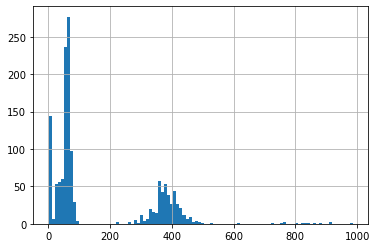

In [102]:
# Filter CTs into their own dataframe
ct_series_df = series_df_filter[series_df_filter['Modality'].isin(['CT'])]
# print(ct_series_df['SeriesDescription'].value_counts())
# Limit to thin slice CTs
ct_series_df['NumberOfSeriesRelatedInstances'] = ct_series_df['NumberOfSeriesRelatedInstances'].apply(pd.to_numeric)

ct_series_df['NumberOfSeriesRelatedInstances'].hist(bins=100)
thins_threshold = 200
ct_series_df = ct_series_df[
    ct_series_df['NumberOfSeriesRelatedInstances']>thins_threshold
]

print(ct_series_df['SeriesDescription'].value_counts())
# ct_series_df